In [1]:
from lppls import lppls, lppls_cmaes, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
##절대경로 참조
import sys, os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))

from library.quant_functions import anal_funcs, data_funcs

In [3]:
df = data_funcs.get_merged_df('^IXIC', '^GSPC', 'GC=F', 'TMF')
df = df.fillna(method = 'pad').reset_index()
df['Date'] = df['Date'].astype(str)

[*********************100%%**********************]  4 of 4 completed


In [4]:
data = df[['Date', '^GSPC']].dropna()
data = data.rename(columns={'^GSPC':'Adj Close'})
## data = data_loader.nasdaq_dotcom()

In [5]:
data = data.tail(500)

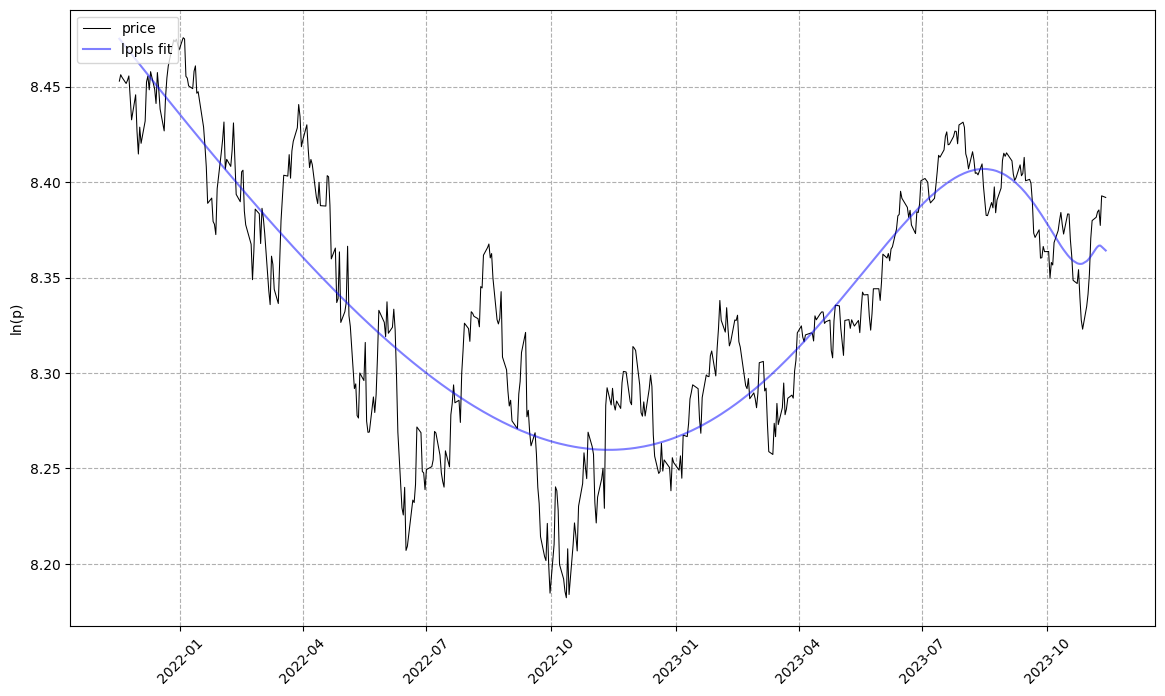

In [6]:
# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls_cmaes.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()

In [7]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=1,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

  0%|          | 0/381 [00:00<?, ?it/s]

100%|██████████| 381/381 [06:27<00:00,  1.02s/it]


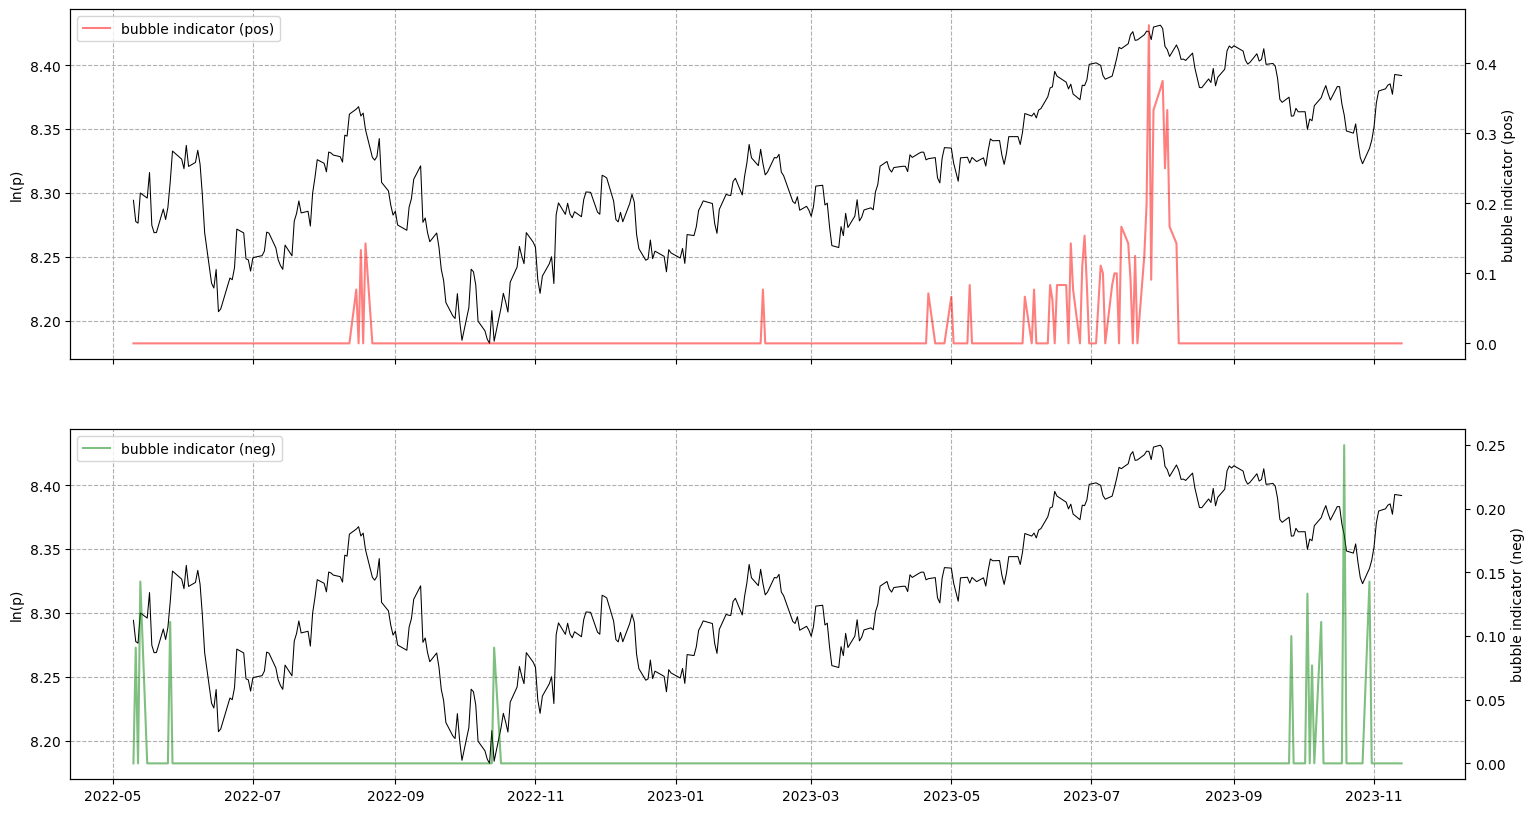

In [8]:
lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...

In [9]:
temp_df = lppls_model.compute_indicators(res)

In [38]:
dt.fromordinal(738823)

datetime.datetime(2023, 10, 30, 0, 0)

In [32]:
temp_df[temp_df['neg_conf'] > 0]

,time,price,pos_conf,neg_conf,_fits
116,736269.0,7.655258,0.0,0.083333,"[{'tc_d': '2058-01-05', 'tc': 751309.330414895..."
467,736780.0,7.868109,0.0,0.076923,"[{'tc_d': '2069-02-16', 'tc': 755369.441175068..."
475,736793.0,7.868315,0.0,0.090909,"[{'tc_d': '2048-05-31', 'tc': 747803.660944813..."
614,736991.0,7.884614,0.0,0.055556,"[{'tc_d': '2018-12-17', 'tc': 737045.996248650..."
636,737024.0,7.891125,0.0,0.076923,"[{'tc_d': '2018-11-26', 'tc': 737024.000065246..."
657,737055.0,7.819568,0.0,0.083333,"[{'tc_d': '2119-11-25', 'tc': 773912.406079992..."
659,737059.0,7.826782,0.0,0.111111,"[{'tc_d': '2147-02-24', 'tc': 783865.589418944..."
1461,738222.0,8.335839,0.0,0.200000,"[{'tc_d': '2045-02-24', 'tc': 746611.642802568..."
1503,738281.0,8.324419,0.0,0.071429,"[{'tc_d': '2119-07-14', 'tc': 773778.674408607..."
1505,738285.0,8.294312,0.0,0.111111,"[{'tc_d': '2022-08-05', 'tc': 738372.411534811..."


<Axes: >

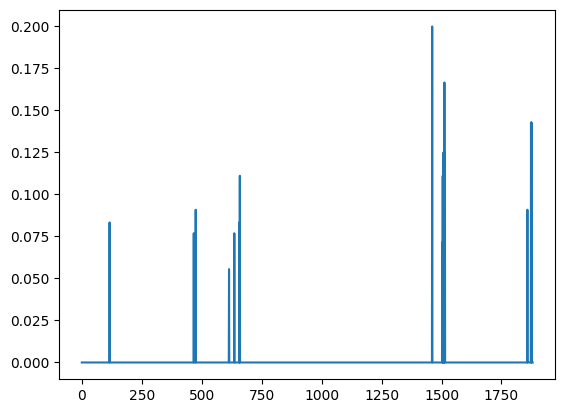

In [20]:
lppls_model.compute_indicators(res)['neg_conf'].plot()

In [10]:
import torch
from torch import nn

In [23]:
w = torch.empty(3, 5)

In [29]:
w

tensor([[9.2755e-39, 9.1837e-39, 9.3674e-39, 1.0745e-38, 1.0653e-38],
        [9.5510e-39, 1.0561e-38, 1.0194e-38, 1.1112e-38, 1.0561e-38],
        [9.9184e-39, 1.0653e-38, 4.1327e-39, 1.0194e-38, 1.0469e-38]])

In [28]:
_w = w.clone().detach()

In [30]:
nn.init.xavier_uniform_(_w, gain=nn.init.calculate_gain('relu'))

tensor([[-0.8079,  1.2024,  0.0784,  0.8153,  0.3481],
        [ 0.1734,  0.7527,  0.2840,  0.6841,  0.2009],
        [ 0.7002,  0.1083, -0.4074, -0.4054,  0.5609]])

In [31]:
_w = w.clone().detach()

In [32]:
nn.init.xavier_normal_(_w, gain=nn.init.calculate_gain('relu'))

tensor([[ 0.5353,  0.3843,  0.2713,  0.5702,  0.7479],
        [ 0.3023,  0.4130, -0.8787,  0.5535, -0.7721],
        [ 1.4242, -1.5829, -0.7146, -0.0971,  1.2795]])